# Abstract:
In this project, natural language processing (NLP) model is developed to make prediction about person's personality type using Myers Briggs Personality test (MBTI). 

# Introduction:
The Myers–Briggs Type Indicator (MBTI) is an introspective self-report questionnaire indicating differing psychological preferences in how people perceive the world and make decisions. The test attempts to assign four categories: introversion or extraversion, sensing or intuition, thinking or feeling, judging or perceiving. One letter from each category is taken to produce a four-letter test result, like "INFJ" or "ENFP". (Source: Wikipedia)

# Dataset:
This project has four parts which looks at different aspects of person's personality. This notebook is looking at predicting "introvertedness" in people by analyzing their social media posts.
Dataset for this project is mainly from kaggle website complemented by tweets consisting the personality tags.
Dataset: https://www.kaggle.com/datasnaek/mbti-type
The web scraping alogrithm to acquire tweets is reflected in Web_scarping notebook.

# Preprocessing:
The first part of the project is data exploration and labeling. Data exploration will give an intuition about how to go about the Machine learning algorithm. We are using supervised learning in which the data has been already labeled, however, we need to determine which posts are related to introverts.This can be done by looking at "I" in "INFP" and classify those labels as an introvert person. Example below demonstrates how the data generally looks like:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
type/posts
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
type: INFJ.	                                                                                                                Post: and intj moments   sportscenter not top ten plays    pranks|||What has been the most life-changing experience in your life?|||  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390   ...|||Welcome and stuff.||| Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in 


In [28]:
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [29]:
dataset = pd.read_csv('mbti.csv')

In [30]:
D=dataset.iloc[:]

In [31]:
X = D.iloc[:, :-1].values
Y = D.iloc[:, -1].values

In [32]:
from collections import Counter
my_dt = pd.DataFrame(X)
Lx = [i[0] for i in my_dt.values.tolist()]
result = {}    
for word in Lx:                                                                                                                                                                                               
    result[word] = result.get(word, 0) + 1    

In [33]:
D={k: v for k, v in sorted(result.items(), key=lambda item: item[1])}

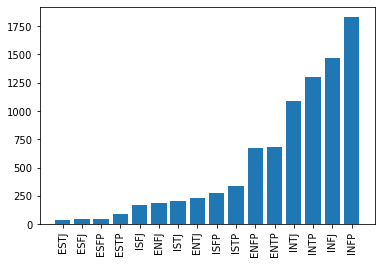

In [34]:
import matplotlib.pyplot as plt
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xticks(rotation=90)
plt.show()

# Class imbalance:
There is a class-imbalance in dataset in which some personality types are presented more than others. For example, there are 2000 extroverts and over 6000 introverts. To solve this issue, we need to balance the classes.

In [35]:
I1=[]
I2=[]
I3=[]
N=0
St1="I"
St2="E"
for i in range (0,len(Y)):
    I1.append(Y[i])
    
    if X[i][0][N]==St1:
        I2.append(St1)
    
    if X[i][0][N]==St2:
        I2.append(St2)
        
    

In [36]:
my_dt = pd.DataFrame(I2)
Lx = [i[0] for i in my_dt.values.tolist()]
result = {}    
for word in Lx:                                                                                                                                                                                               
    result[word] = result.get(word, 0) + 1    
D={k: v for k, v in sorted(result.items(), key=lambda item: item[1])}
D

{'E': 1999, 'I': 6676}

In [37]:
I=[]
E=[]

for i in range (0,len(Y)):
    
    
    if X[i][0][N]==St1:
        T1=(St1,Y[i])
        I.append(T1)
    
    if X[i][0][N]==St2:
        T2=(St2,Y[i])
        E.append(T2)

In [38]:
I_balanced=(I[0:1999])

In [39]:
IEx=[]
IEy=[]
for el in I_balanced:
    IEy.append(el[0])
    IEx.append(el[1])
for El in E:
    IEy.append(El[0])
    IEx.append(El[1])

In [40]:
p1 = pd.Series([item for item in IEx ])
p2 = pd.Series([item for item in IEy])

II=pd.DataFrame({"words":p1,"I/E":p2})

# NLP model
I used Spacy pre-trained NLP package which is famous and accurate. It will tokenize and reduce the vector space by ignoring unimportant words such as am, is are... For processing, TFIDF bigram and unigram model are used which in addition to each word's frequency, it also look at two nearest words for more accurate results.

In [41]:
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
nlp = spacy.load('en_core_web_sm')

In [42]:
punctuations = string.punctuation

# Create our list of stopwords

stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    sentence= re.sub("[^a-zA-Z]"," ", sentence)
    sentence= re.sub(r'\b\w{1,3}\b', '', sentence)
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [43]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [44]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [45]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [46]:
p1 = pd.Series([item for item in IEx ])
p2 = pd.Series([item for item in IEy])

II=pd.DataFrame({"words":p1,"I/E":p2})

In [76]:
type(I_balanced[10][1])

str

In [77]:
IN=[]
for i in range(len(I_balanced)):
    s=spacy_tokenizer(I_balanced[i][1]) 
    IN.append(s)
    

In [78]:
IE=[]
for i in range(len(E)):
    s=spacy_tokenizer(E[i][1]) 
    IE.append(s)

# More exploration:
This section explore the word frequency for the introveted and extroverted people. Word clouds can provide a nice visualization of more frequent words in the text. Following two figures are the 100 most frequent words for introverts and extroverts. The word "like" is the most frquently used word in both categories. 

In [79]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([str(IN), str(IE)])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
TFIDF_PERS=pd.DataFrame({"I":df.iloc[0],"E":df.iloc[1]})

In [80]:
I=pd.DataFrame({"I":TFIDF_PERS["I"]}).sort_values('I',ascending=False)
E=pd.DataFrame({"E":TFIDF_PERS["E"]}).sort_values('E',ascending=False)

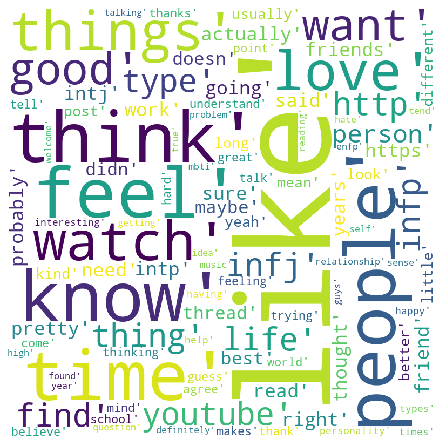

In [81]:
C=[]
for i in range(0,99):
    C.append(I.index[i])
C1=str(C)
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 5).generate(C1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

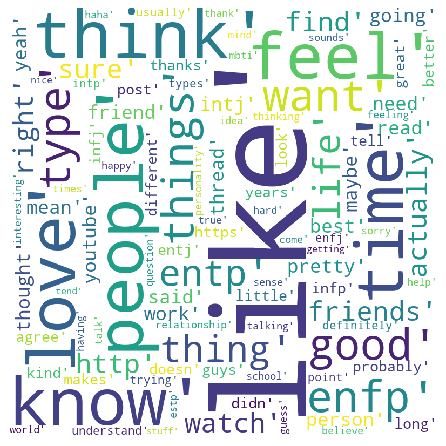

In [82]:
C=[]
for i in range(0,99):
    C.append(E.index[i])
C1=str(C)
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 5).generate(C1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Machine Learning:
Logestic reggression was selected among 6 different classifier showing the best results. Logestic reggresion ustilizes the sigmoid function for classification and demonstrated the promissing results in NLP world. 

In [86]:
from sklearn.utils import shuffle
II= shuffle(II)

In [87]:
import numpy as np
X_train=II["words"]
y_multilabel=np.c_[II["I/E"]]

In [88]:
from sklearn.preprocessing import OrdinalEncoder
Inp=y_multilabel

ordinal_encoder = OrdinalEncoder()
Iencd = ordinal_encoder.fit_transform(Inp)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,Iencd, test_size = 0.2, random_state = 42)

In [90]:
import re
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
#Training the model using parameters from the grid search
classifier = LogisticRegression(penalty='l2',dual=False, tol=0.1, C=0.01, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=10,solver='liblinear', max_iter=500, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', OneVsRestClassifier(classifier))])

# model generation
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7fc0048bc350>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7fc00dd48dd0>)),
                ('classifier',
                 OneVsRestClassifier(estimator=LogisticRegression(C=0.01,
                                                                  max_iter=500,
                                                                  random_state=10,
                                                                  solver='liblinear',
                                                                  tol=0.1)))])

In [22]:
from sklearn.metrics import precision_score
predicted1 = pipe.predict(X_test)
precision_score(y_test, predicted1, average='macro')

0.8222499515258415

In [23]:
from sklearn import metrics
# Predicting with a test dataset
predicted1 = pipe.predict(X_test)
#sklearn.metrics.f1_score
print("logestic Accuracy:",metrics.f1_score(y_test, predicted1, labels=None, pos_label=1, average='micro', sample_weight=None, zero_division='warn'))


logestic Accuracy: 0.82125


In [25]:
import dill
import gzip
with gzip.open('model.dill.gzip', 'wb') as f:
    dill.dump(pipe, f, recurse=True)

# Model has 0.82 accuracy in recognizing introvertness in people's social media posts

The hyperparameter in logestic reggresion was obtained using Grid search cv which uses cross validation to optimize hyper parameters.

# GRID SEARCH

In [159]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
gs = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('gs', gs)])


In [160]:
grid_result = pipe.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/opt/conda/envs/data3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best: 0.781152 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.739228 (0.017242) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.739045 (0.018739) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.736862 (0.017349) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.741655 (0.017777) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.740198 (0.019332) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.741109 (0.017498) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.746144 (0.018180) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.745658 (0.017710) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.745477 (0.018027) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.757186 (0.018394) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.756761 (0.019071) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.757489 (0.019049) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.780788 (0.017762) wi

In [161]:
print("The best hyperparameter value is: ", gs.best_params_)

The best hyperparameter value is:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


#

In [149]:
from sklearn import metrics
import requests
from bs4 import BeautifulSoup
url="https://www.goodreads.com/book/show/15881.Harry_Potter_and_the_Chamber_of_Secrets?ac=1&from_search=true&qid=XmkTPrJ2OK&rank=5"
response = requests.get(url).text
bs = BeautifulSoup(response, features='lxml')
Link_date=bs.select(".readable")
Link_date[1].text
B=[]
for l in Link_date:
    B.append(l.text)
s=[B for B in B if len(B)>250]

In [150]:
predicted2 = pipe.predict(s)

In [151]:
predicted2

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1.])

In [152]:
Introvert=0
Etrovert=0
import numpy as np
for i in range(len(predicted2)):
    if predicted2[i]==np.float64(1):
        Introvert=Introvert+1
    else:
        Etrovert=Etrovert+1
S1=Introvert/len(predicted2)
S2=Etrovert/len(predicted2)

In [166]:
dill.dump(pipe, open('estimator.dill', 'w'))

0.4782608695652174

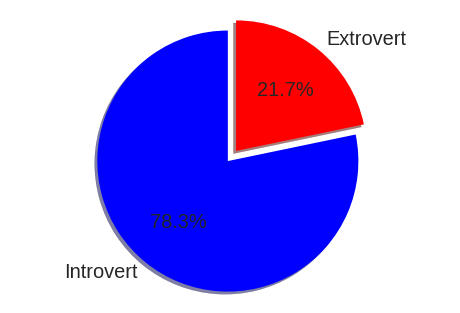

In [36]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Introvert', 'Extrovert'
color='blue','red'
sizes = [S1, S2]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
#fig1, ax1 = plt.subplots(nrows=3, ncols=2)
fig1, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.pie(sizes, explode=explode, labels=labels, colors=color,  autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 20})
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / 10) for i in range(10)])
#ax1.set_title('Harry Potter"s readers Introversion Percentage', fontweight='bold')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [174]:
import json
with open('D1.txt') as json_file:
    data = json.load(json_file)

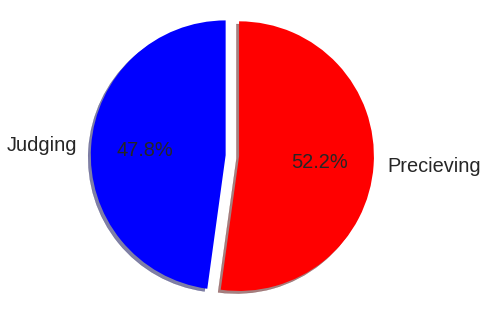

In [167]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Judging', 'Precieving'
color='blue','red'
sizes = [S1, S2]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
#fig1, ax1 = plt.subplots(nrows=3, ncols=2)
fig1, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.pie(sizes, explode=explode, labels=labels, colors=color,  autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 20})
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / 10) for i in range(10)])
#ax1.set_title('Harry Potter"s readers Introversion Percentage', fontweight='bold')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [175]:
predicted2 = pipe.predict(data[55].values())
predicted2

array([1.])

In [176]:
Result={}
s=0
l=[]
for i in range (len(data)):
    j=0
    for k, v in data[i].items():
        s+=pipe.predict([v])
        l.append(s)
    Result[k]=s/len(l)

In [177]:
Result

{'Harry Potter and the Deathly Hallows (Harry Potter, #7)': array([0.8]),
 'The Kite Runner': array([0.83333333]),
 'The Giver (The Giver, #1)': array([0.86666667]),
 'The Giving Tree': array([0.7]),
 "Charlotte's Web": array([0.65333333]),
 'Little Women': array([0.66666667]),
 'The Hunger Games (The Hunger Games, #1)': array([0.6952381]),
 'The Hobbit, or There and Back Again': array([0.7]),
 'Green Eggs and Ham': array([0.7037037]),
 'Of Mice and Men': array([0.7])}

In [179]:
pipe.predict([v])

array([1.])

In [ ]:
Result